In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta # 6개월 전 날짜 구하기

import nltk # 자연어 처리를 위한 파이썬 패키지
from nltk.tokenize import RegexpTokenizer # 토큰화 시 기호도 한 번에 제거, 현재 오류로 사용 안함
from nltk import Text # 단어 빈도 시각화
from collections import Counter # 단어 빈도 데이터프레임화
from wordcloud import WordCloud, STOPWORDS # 워드클라우드 시각화, 불용어 처리
import re # 불용어 처리 시 사용하는 정규표현식

In [3]:
nltk.download('punkt') # 토큰화 작업을 위해 필요한 파일

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords') # 불용어 처리를 위해 다운로드

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
nltk.download('averaged_perceptron_tagger') # pos_tag 작업을 위해 다운

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 6개월 데이터

In [6]:
volvo = pd.read_csv("volvo_newsscraping.csv")
volvo.head(3)

,뉴스구분,날짜,제목,요약,본문
0,By Press information,4/20/2023,STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQ...,Robust earnings and continued demand in Europe...,"In Q1, 2023, Volvo CE has secured good profita..."
1,By Press information,3/23/2023,KAMEL SID APPOINTED HEAD OF OPERATIONS AT VOLV...,Volvo Construction Equipment (Volvo CE) has an...,"Kamel, who has held the position of acting Hea..."
2,By Press information,3/15/2023,VOLVO CONSTRUCTION EQUIPMENT HIGHLIGHTS COMPLE...,Volvo Construction Equipment (Volvo CE) showca...,Volvo CE presented an immersive platform of st...


In [7]:
current = datetime.datetime.now().date()
print(current)

2023-06-08


In [8]:
six_month_ago = current + relativedelta(months = -6)
print(six_month_ago)

2022-12-08


In [9]:
volvo['날짜'] = pd.to_datetime(volvo['날짜'])
volvo.head(3)

,뉴스구분,날짜,제목,요약,본문
0,By Press information,2023-04-20,STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQ...,Robust earnings and continued demand in Europe...,"In Q1, 2023, Volvo CE has secured good profita..."
1,By Press information,2023-03-23,KAMEL SID APPOINTED HEAD OF OPERATIONS AT VOLV...,Volvo Construction Equipment (Volvo CE) has an...,"Kamel, who has held the position of acting Hea..."
2,By Press information,2023-03-15,VOLVO CONSTRUCTION EQUIPMENT HIGHLIGHTS COMPLE...,Volvo Construction Equipment (Volvo CE) showca...,Volvo CE presented an immersive platform of st...


In [10]:
# 6개월 데이터
six_month_volvo = volvo[(volvo['날짜'] > '2022-12-08') & (volvo['날짜'] <= '2023-06-08')]
six_month_volvo.tail()

,뉴스구분,날짜,제목,요약,본문
16,By Press information,2023-01-26,VOLVO CONSTRUCTION EQUIPMENT INCREASES SALES A...,Volvo Construction Equipment (Volvo CE) has ac...,All global markets have enjoyed an increase in...
17,By Press information,2023-01-23,VOLVO CONSTRUCTION EQUIPMENT LEADS INDUSTRY CH...,As part of its ambition towards industry trans...,The Arvika factory in Sweden specializes in th...
18,By Press information,2023-01-18,VOLVO CE TO SHOWCASE SOLUTIONS FOR A CHANGING ...,Attendees will have the opportunity to test dr...,Volvo Construction Equipment (Volvo CE) is bui...
19,By Press information,2023-01-18,VOLVO CE INTRODUCES FIRST ELECTRIC MACHINE FOR...,Volvo Construction Equipment (Volvo CE) is unv...,The DD25 Electric will be unveiled at CONEXPO ...
20,By Press information,2023-01-11,VOLVO CE INTRODUCES COLLISION MITIGATION SYSTE...,"Delivering on its vision for zero accidents, V...",The first system of its kind from any original...


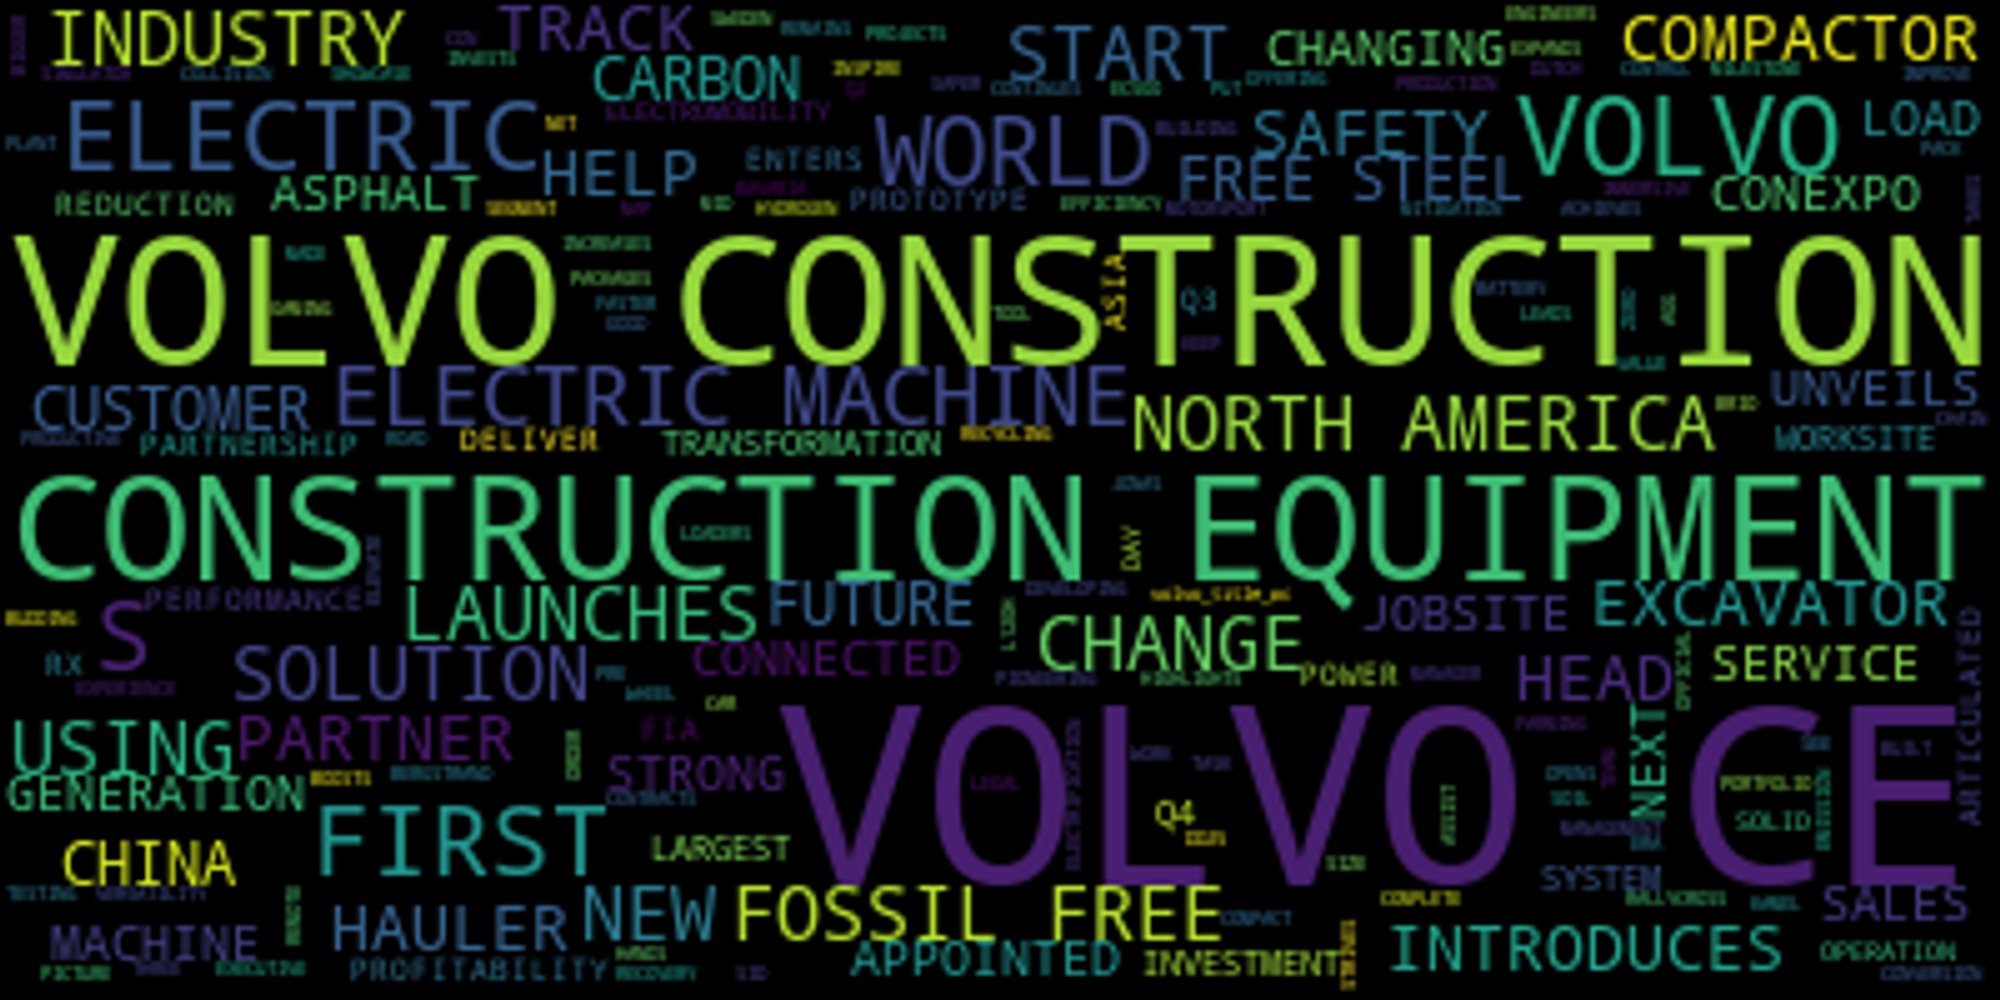
- 불용어 처리 안하고 한 초기 시각화

# 기사 제목

In [11]:
# 데이터프레임 내 '제목' 컬럼을 리스트화
volvo_title = volvo["제목"].values.tolist()
volvo_title[:5]

['STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQUIPMENT',
 'KAMEL SID APPOINTED HEAD OF OPERATIONS AT VOLVO CONSTRUCTION EQUIPMENT',
 'VOLVO CONSTRUCTION EQUIPMENT HIGHLIGHTS COMPLETE SOLUTIONS FOR A CHANGING INDUSTRY WITH IMMERSIVE EXPERIENCE AT CONEXPO-CON/AGG',
 'VOLVO CONSTRUCTION EQUIPMENT HELPS CUSTOMERS SEE BIGGER PICTURE WITH CONNECTED MAP IN NORTH AMERICA',
 'VOLVO CE DELIVERS NORTH AMERICA’S FIRST MACHINE MADE USING FOSSIL-FREE STEEL']

In [12]:
# 문장을 토큰화(문장을 단어로 끊어냄)
volvo_title_token = []
for i in volvo_title:
    # word_tokenize(i) 시 출력되는 형태 ex) ',' 포함 출력
    volvo_token = nltk.word_tokenize(i)
    # 아래 코드는 오류 발생
    # retokenize = nltk.RegexpTokenizer('[\w]+')
    print(nltk.word_tokenize(i))
    volvo_title_token.append(volvo_token)

['STRONG', 'START', 'TO', '2023', 'FOR', 'VOLVO', 'CONSTRUCTION', 'EQUIPMENT']
['KAMEL', 'SID', 'APPOINTED', 'HEAD', 'OF', 'OPERATIONS', 'AT', 'VOLVO', 'CONSTRUCTION', 'EQUIPMENT']
['VOLVO', 'CONSTRUCTION', 'EQUIPMENT', 'HIGHLIGHTS', 'COMPLETE', 'SOLUTIONS', 'FOR', 'A', 'CHANGING', 'INDUSTRY', 'WITH', 'IMMERSIVE', 'EXPERIENCE', 'AT', 'CONEXPO-CON/AGG']
['VOLVO', 'CONSTRUCTION', 'EQUIPMENT', 'HELPS', 'CUSTOMERS', 'SEE', 'BIGGER', 'PICTURE', 'WITH', 'CONNECTED', 'MAP', 'IN', 'NORTH', 'AMERICA']
['VOLVO', 'CE', 'DELIVERS', 'NORTH', 'AMERICA', '’', 'S', 'FIRST', 'MACHINE', 'MADE', 'USING', 'FOSSIL-FREE', 'STEEL']
['VOLVO', 'CONSTRUCTION', 'EQUIPMENT', 'OPENS', 'PRE-ORDER', 'TOOL', 'IN', 'NORTH', 'AMERICA', 'FOR', 'NEW', 'DD25', 'ELECTRIC', 'ASPHALT', 'COMPACTOR']
['VOLVO', 'CE', 'LAUNCHES', 'THREE', 'COMPACT', 'ASSIST', 'PACKAGES', 'FOR', 'VOLVO', 'SOIL', 'COMPACTORS']
['VOLVO', 'REMOTE', 'CONTROL', 'EXCAVATORS', 'PUT', 'SAFETY', 'AND', 'VERSATILITY', 'IN', 'YOUR', 'HANDS']
['VOLVO', 'CONS

In [13]:
# 각 리스트들을 하나의 리스트로 합침.
title_token_all = []
for sublist in volvo_title_token:
    title_token_all.extend(sublist)

In [14]:
title_token_all[:10]

['STRONG',
 'START',
 'TO',
 '2023',
 'FOR',
 'VOLVO',
 'CONSTRUCTION',
 'EQUIPMENT',
 'KAMEL',
 'SID']

## 불용어 처리 전 단어 빈도 시각화

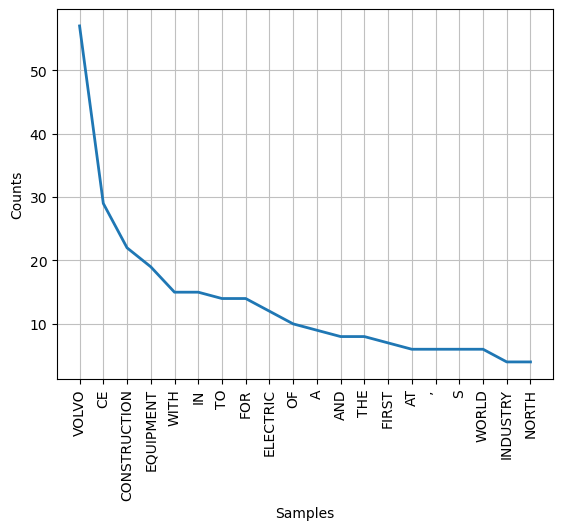

In [15]:
text = Text(title_token_all)
text.plot(20)
plt.show()

In [16]:
# Counter() 를 사용하여 단어 빈도가 많은 단어순으로 데이터프레임화
c = Counter(title_token_all)
word_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
word_df

,word,count
0,VOLVO,57
1,CE,29
2,CONSTRUCTION,22
3,EQUIPMENT,19
4,WITH,15
...,...,...
301,SCIENCE,1
302,BASED,1
303,TARGETS,1
304,APPROVED,1


## 불용어 처리

In [17]:
# 영어 불용어 단어 리스트를 불러와 변수에 저장
stopwords = nltk.corpus.stopwords.words('english')

In [18]:
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [19]:
# 지영님 불용어 처리 단어들 불러옴
a = pd.read_csv('stop_words.csv')
a['0'] # '0'이란 데이터프레임 컬럼에 불용어 단어들이 들어있음

0           a
1         but
2      during
3        hows
4        it's
        ...  
234      2023
235      2022
236      2022
237         –
238       NaN
Name: 0, Length: 239, dtype: object

In [20]:
# a의 2차원 리스트를 1차원 리스트로 변환
# 그렇지 않으면 기존의 stopwords 변수와 합칠 때 형식이 달라 오류가 발생
a_list=[]
for i in a['0']:
    a_list.append(i)

In [21]:
a_list[:5]

['a', 'but', 'during', 'hows', "it's"]

In [22]:
# nltk의 기존 불용어에 지영님 불용어 결합
stopwords = stopwords+a_list

In [23]:
# nltk의 불용어는 모두 소문자 형태이기 때문에, 뉴스 제목에서 토큰화한 것들을 소문자 처리
title_lower=[]
for word in title_token_all:
    title_lower.append(word.lower())

In [24]:
title_lower[:5]

['strong', 'start', 'to', '2023', 'for']

In [25]:
# 정규 표현식 활용, 기호 제거
filtered_title = [re.sub(r'[^\s\w]', ' ', word) for word in title_lower if word not in stopwords]

## 불용어 처리 후 단어 빈도 시각화

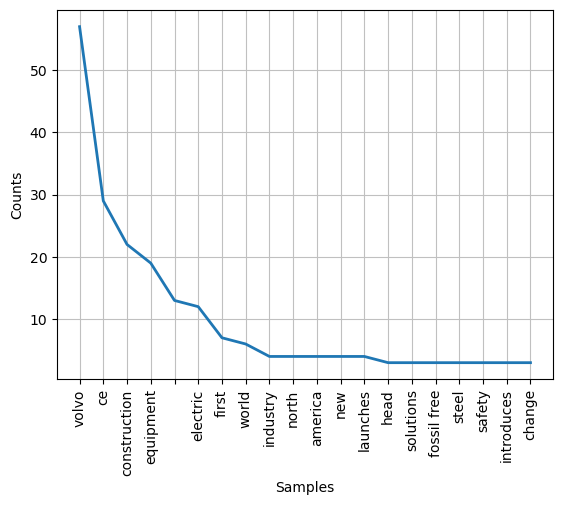

In [26]:
text = Text(filtered_title)

text.plot(20)
plt.show()

In [27]:
c = Counter(filtered_title)
word_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
word_df

,word,count
0,volvo,57
1,ce,29
2,construction,22
3,equipment,19
4,,13
...,...,...
259,science,1
260,based,1
261,targets,1
262,approved,1


In [28]:
word_df.to_csv('volvo_title_words.csv', index=False)

## 소문자 워드클라우드(volvo, ce 등 단어 존재)

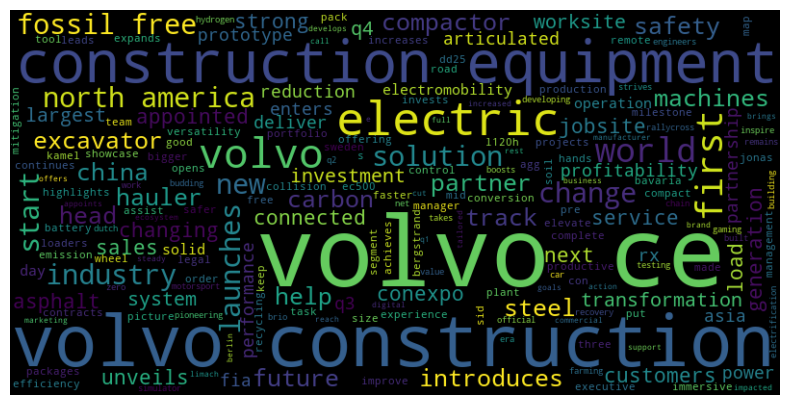

In [29]:
# 리스트에 담긴 단어들을 공백으로 연결하여 문자열로 변환
text = ' '.join(filtered_title)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 불용어 추가

In [30]:
b = ['volvo', 'ce', 'construction', 'equipment', ' ']
stopwords = stopwords+b

In [31]:
filtered_title = [re.sub(r'[^\s\w]', ' ', word) for word in title_lower if word not in stopwords]

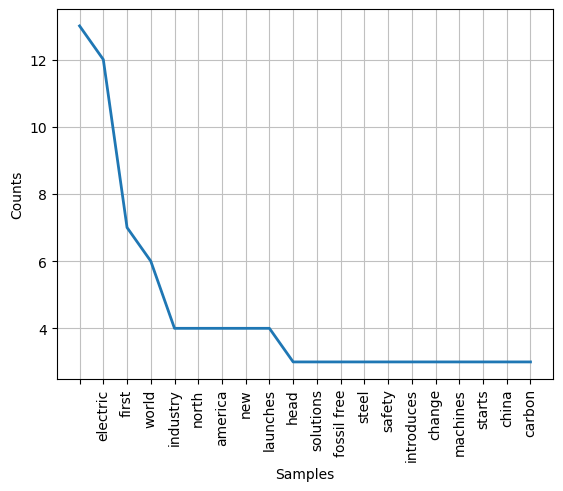

In [32]:
text = Text(filtered_title)

text.plot(20)
plt.show()

In [33]:
c = Counter(filtered_title)
word_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
word_df

,word,count
0,,13
1,electric,12
2,first,7
3,world,6
4,industry,4
...,...,...
255,science,1
256,based,1
257,targets,1
258,approved,1


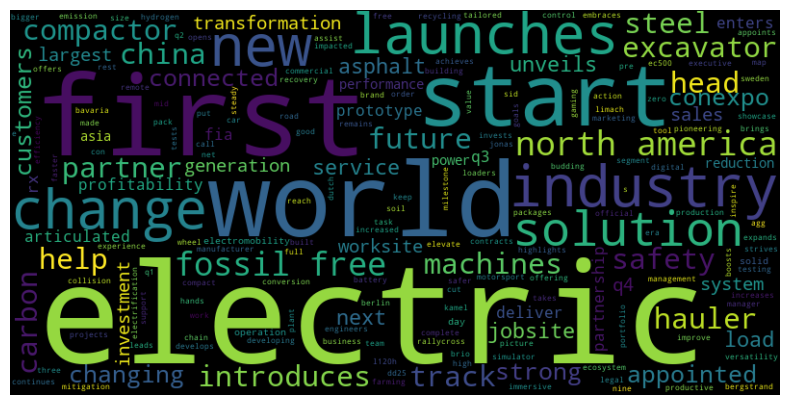

In [34]:
# 리스트에 담긴 단어들을 공백으로 연결하여 문자열로 변환
text = ' '.join(filtered_title)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 대문자->소문자 변경 하지 않고

In [35]:
# 임의로 정한 불용어 추가
b = ['VOLVO', 'CE', 'CONSTRUCTION', 'EQUIPMENT', 'WITH', 'IN', 'TO', 'FOR', 'OF', 'A', 'AND', 'THE', 
     'AT', 'S', 'ON', 'FROM', 'HERE', 'ITS', 'BY', 'SEE', 'PUT', 'YOUR', 'MORE', 'INTO', 'TAKES', 'OFF', 'AS',
     'WHY', 'ARE', 'CUT', '2021', 'OVER', 'YOU', 'COULD', 'ONLY', 'IT', 'NOT', 'JUST']

In [36]:
stopwords = stopwords+b
filtered_title = [re.sub(r'[^\s\w]', ' ', word) for word in title_token_all if word not in stopwords]

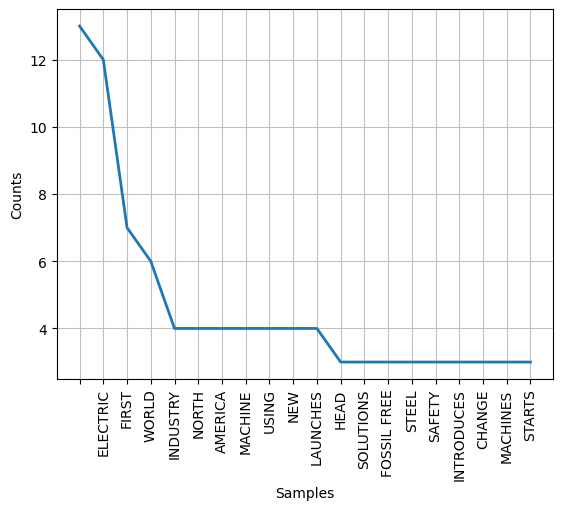

In [37]:
text = Text(filtered_title)

text.plot(20)
plt.show()

In [38]:
c = Counter(filtered_title)
word_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
word_df

,word,count
0,,13
1,ELECTRIC,12
2,FIRST,7
3,WORLD,6
4,INDUSTRY,4
...,...,...
256,SCIENCE,1
257,BASED,1
258,TARGETS,1
259,APPROVED,1


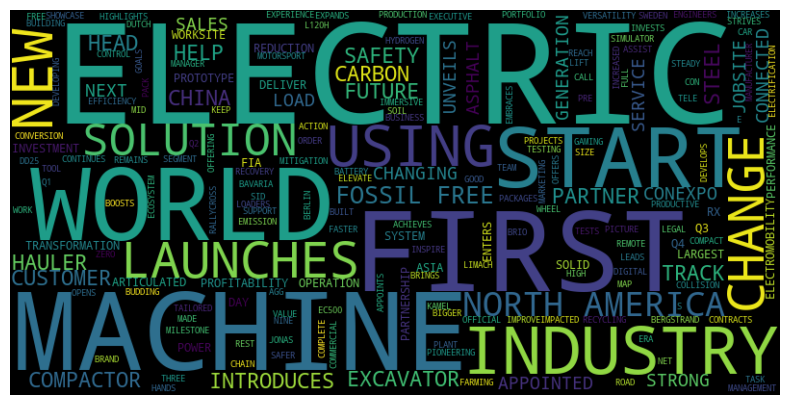

In [39]:
# 리스트에 담긴 단어들을 공백으로 연결하여 문자열로 변환
text = ' '.join(filtered_title)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 문제 상황
- 새로 출시되는 모델명 등은, count가 1번만 되는 경우가 많음. ex. (CX01,1), (LX03,1), (Q1,1)

In [92]:
word_df[word_df['count']>1]

,word,count
0,,13
1,ELECTRIC,12
2,FIRST,7
3,WORLD,6
4,INDUSTRY,4
...,...,...
56,PERFORMANCE,2
57,REDUCTION,2
58,ASIA,2
59,ELECTROMOBILITY,2


### pos_tag(품사 태깅)
- 품사(part-of-speech, POS)
- 형태소 태깅이란, 문장 내 단어들을 품사별로 식별하여 분류하고, 그에 따라 태그를 붙이는 과정
- 참고 자료:https://blog.naver.com/nabilera1/222280075004
- 대문자로 그대로 진행하는 경우, 'WITH', 'IN', 'TO'와 같은 전치사, 접속사, 대명사 등 불필요한 요소가 카운팅이 많이 됨.
- 불용어를 수작업으로 하는 것에 한계가 있기 때문에 품사 중 명사만 사용하도록 설정해봄

In [73]:
b = ['VOLVO', 'CE', 'CONSTRUCTION', 'EQUIPMENT', ' ']

In [74]:
filtered_title = [re.sub(r'[^\s\w]', ' ', word) for word in title_token_all if word not in stopwords]

In [75]:
nltk.pos_tag(filtered_title)

[('STRONG', 'JJ'),
 ('START', 'NNP'),
 ('TO', 'NNP'),
 ('FOR', 'NNP'),
 ('KAMEL', 'NNP'),
 ('SID', 'NNP'),
 ('APPOINTED', 'NNP'),
 ('HEAD', 'NNP'),
 ('OF', 'IN'),
 ('OPERATIONS', 'NNP'),
 ('AT', 'NNP'),
 ('HIGHLIGHTS', 'NNP'),
 ('COMPLETE', 'NNP'),
 ('SOLUTIONS', 'NNP'),
 ('FOR', 'IN'),
 ('A', 'NNP'),
 ('CHANGING', 'NNP'),
 ('INDUSTRY', 'NNP'),
 ('WITH', 'NNP'),
 ('IMMERSIVE', 'NNP'),
 ('EXPERIENCE', 'NNP'),
 ('AT', 'NNP'),
 ('CONEXPO CON AGG', 'NNP'),
 ('HELPS', 'NNP'),
 ('CUSTOMERS', 'NNP'),
 ('SEE', 'NNP'),
 ('BIGGER', 'NNP'),
 ('PICTURE', 'NNP'),
 ('WITH', 'NNP'),
 ('CONNECTED', 'NNP'),
 ('MAP', 'NNP'),
 ('IN', 'NNP'),
 ('NORTH', 'NNP'),
 ('AMERICA', 'NNP'),
 ('DELIVERS', 'NNP'),
 ('NORTH', 'NNP'),
 ('AMERICA', 'NNP'),
 (' ', 'NNP'),
 ('S', 'NNP'),
 ('FIRST', 'NNP'),
 ('MACHINE', 'NNP'),
 ('MADE', 'NNP'),
 ('USING', 'NNP'),
 ('FOSSIL FREE', 'NNP'),
 ('STEEL', 'NNP'),
 ('OPENS', 'NNP'),
 ('PRE ORDER', 'NNP'),
 ('TOOL', 'NNP'),
 ('IN', 'NNP'),
 ('NORTH', 'NNP'),
 ('AMERICA', 'NNP'),


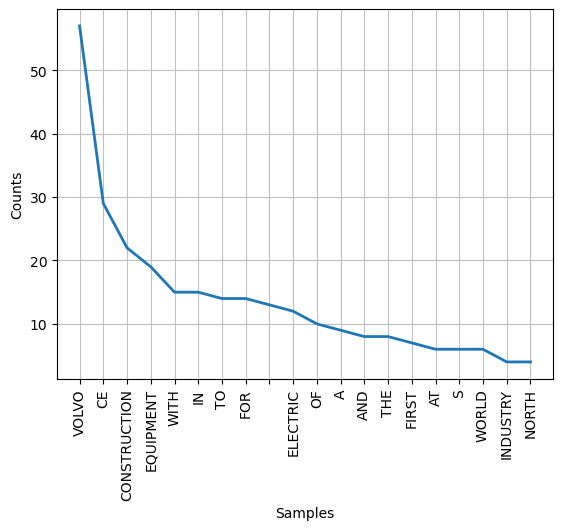

In [67]:
text = Text(filtered_title)

text.plot(20)
plt.show()

In [68]:
c = Counter(filtered_title)
word_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
word_df

,word,count
0,VOLVO,57
1,CE,29
2,CONSTRUCTION,22
3,EQUIPMENT,19
4,WITH,15
...,...,...
294,SCIENCE,1
295,BASED,1
296,TARGETS,1
297,APPROVED,1


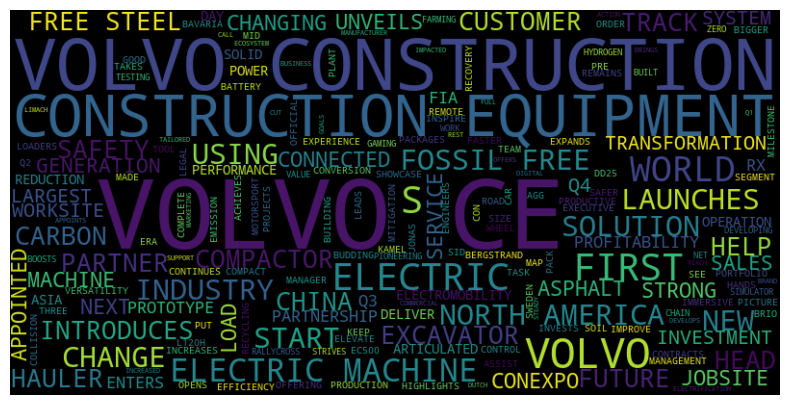

In [69]:
# 리스트에 담긴 단어들을 공백으로 연결하여 문자열로 변환
text = ' '.join(filtered_title)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 기사 본문

In [40]:
# 데이터프레임 내 '본문' 컬럼을 리스트화
volvo_content = volvo["본문"].values.tolist()
volvo_content[:5]

['In Q1, 2023, Volvo CE has secured good profitability and a boost to its operating margin with continued demand in large infrastructure and construction projects – particularly in North America and Europe – while increasing its own investments into the biggest technological shift in the industry’s history. \r\n\r\nCompared to the same period last year, Volvo CE is reporting a strong boost in sales of 17% in Europe and 37% in North America. This is more than compensating for a dip in sales in Asia and South America where investment levels have slowed down. With the exception of China, activity in the construction industry has continued to be good across most markets, driven primarily by ongoing infrastructure investments and by the mining industry, which benefits from continued good commodity prices.\r\n\r\nMelker Jernberg, President of Volvo CE, says: “Strong profitability and robust sales like the kind we see this quarter is of course important to us and is a testament to the great p

In [41]:
# 문장을 토큰화(문장을 단어로 끊어냄)
volvo_content_token = []
for i in volvo_content:
    volvo_token = nltk.word_tokenize(i)
    print(nltk.word_tokenize(i))
    volvo_content_token.append(volvo_token)

['In', 'Q1', ',', '2023', ',', 'Volvo', 'CE', 'has', 'secured', 'good', 'profitability', 'and', 'a', 'boost', 'to', 'its', 'operating', 'margin', 'with', 'continued', 'demand', 'in', 'large', 'infrastructure', 'and', 'construction', 'projects', '–', 'particularly', 'in', 'North', 'America', 'and', 'Europe', '–', 'while', 'increasing', 'its', 'own', 'investments', 'into', 'the', 'biggest', 'technological', 'shift', 'in', 'the', 'industry', '’', 's', 'history', '.', 'Compared', 'to', 'the', 'same', 'period', 'last', 'year', ',', 'Volvo', 'CE', 'is', 'reporting', 'a', 'strong', 'boost', 'in', 'sales', 'of', '17', '%', 'in', 'Europe', 'and', '37', '%', 'in', 'North', 'America', '.', 'This', 'is', 'more', 'than', 'compensating', 'for', 'a', 'dip', 'in', 'sales', 'in', 'Asia', 'and', 'South', 'America', 'where', 'investment', 'levels', 'have', 'slowed', 'down', '.', 'With', 'the', 'exception', 'of', 'China', ',', 'activity', 'in', 'the', 'construction', 'industry', 'has', 'continued', 'to', 

In [43]:
# 각 리스트들을 하나의 리스트로 합침.
content_token_all = []
for sublist in volvo_content_token:
    content_token_all.extend(sublist)

In [45]:
content_token_all[:10]

['In', 'Q1', ',', '2023', ',', 'Volvo', 'CE', 'has', 'secured', 'good']

## 본문 소문자 처리

In [48]:
content_lower=[]
for word in content_token_all:
    content_lower.append(word.lower())

In [49]:
filtered_title = [re.sub(r'[^\s\w]', ' ', word) for word in content_lower if word not in stopwords]

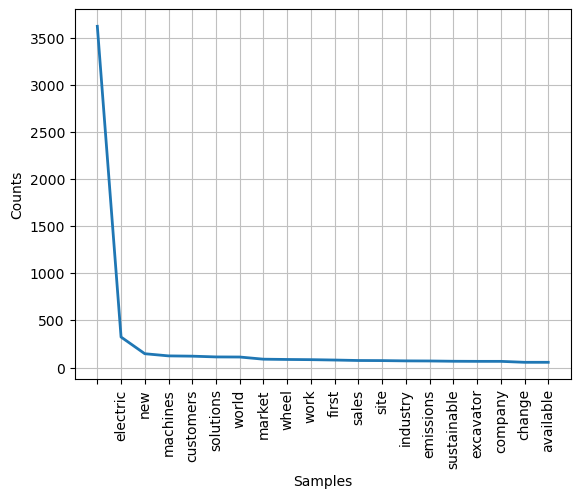

In [50]:
text = Text(filtered_title)

text.plot(20)
plt.show()

In [51]:
c = Counter(filtered_title)
word_df = pd.DataFrame(c.most_common(), columns=['word', 'count']);
word_df

,word,count
0,,3620
1,electric,324
2,new,147
3,machines,124
4,customers,121
...,...,...
4126,cdp,1
4127,institute,1
4128,fund,1
4129,nature,1


In [55]:
word_df.head(30)

,word,count
0,,3620
1,electric,324
2,new,147
3,machines,124
4,customers,121
5,solutions,113
6,world,112
7,market,89
8,wheel,86
9,work,84


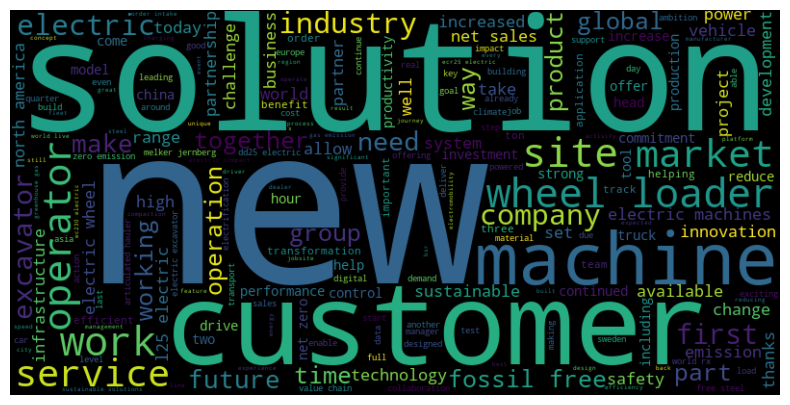

In [52]:
# 리스트에 담긴 단어들을 공백으로 연결하여 문자열로 변환
text = ' '.join(filtered_title)

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()